In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS_Plots/022124_DLSZeta_gradientcopoly_NP1,5,7.5,10_pDNA50to10 copy.xlsx'
sheet_name = "Sheet1"  
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
polymers = df['Polymer']
diameters = df['Effective Diameter Avg.']
stdev = df['Stddev']

In [4]:
np_ratio_colors = {
    '0.0': '#818689',   # N/P=0
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

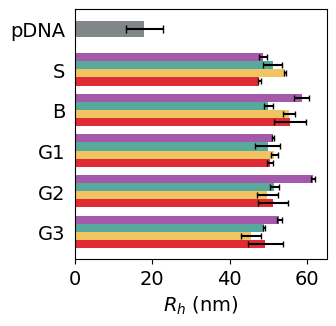

In [5]:
# Set the figure size
plt.figure(figsize=(3.25, 3.25))

# Separate 'pDNA' from the rest of the DataFrame
pDNA_df = df[df['Polymer'] == 'pDNA'].drop_duplicates(subset='Polymer')
rest_df = df[df['Polymer'] != 'pDNA']

# Reset poly_index for the 'pDNA'
poly_index = 0

# Plot 'pDNA' once if it exists in the DataFrame
if not pDNA_df.empty:
    mean_value = pDNA_df['Effective Diameter Avg.'].values[0]
    std_dev = pDNA_df['Stddev'].values[0]
    # Set the height of the 'pDNA' bar to 0.4
    plt.barh(poly_index, mean_value, color=np_ratio_colors[str(pDNA_df['N/P ratio'].values[0])], height=0.4)
    plt.errorbar(x=mean_value, y=poly_index, xerr=std_dev, fmt='none', c='black', capsize=3)

# Increment the poly_index to plot the rest of the polymers below 'pDNA'
poly_index += 1

# Loop through each polymer excluding 'pDNA' to plot bars
for polymer in rest_df['Polymer'].unique():
    poly_df = rest_df[rest_df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate the y position for other bars, keeping them grouped together
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['Effective Diameter Avg.'].mean()
        std_dev = group_df['Stddev'].mean()
        # Set the height of other bars to 0.2
        plt.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)
        plt.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1

plt.gca().invert_yaxis()
plt.tick_params(left=False)
plt.xticks(fontsize=14)
plt.xlabel(r'$R_h$' + ' ' + '(nm)', fontsize=14)
custom_labels = ['pDNA', 'S', 'B', 'G1', 'G2', 'G3']
#plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels, fontweight='bold')
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=14)

plt.show()